In [12]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
dataset = pd.read_csv('sugarcane2.csv')

#df_new['Rainfall'].value_counts()
dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = (dataset['NPK']+dataset['MAP']+dataset['MOP'])/3

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer
0,11000,1602.5,649,54545.45455,0.82
1,9000,1602.5,649,60000.00000,0.82
2,8000,1602.5,649,66250.00000,0.82
3,11000,1602.5,649,63636.36364,0.82
4,11000,1602.5,649,68181.81818,0.82
...,...,...,...,...,...
2322,490,1602.5,494,74922.44898,0.78
2323,671,1602.5,494,78780.92399,0.78
2324,579,1602.5,494,70115.71675,0.78
2325,391,1602.5,494,64468.03069,0.78


In [26]:
dataset['fertilizer'].value_counts()

0.73    1276
0.78     344
0.64     259
1.00     232
0.82     216
Name: fertilizer, dtype: int64

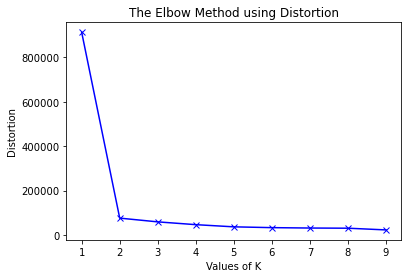

In [17]:
X=dataset.values
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

[[-0.20051002  1.10185381  0.37464902 -0.08005487  0.63238404 -1.3010815 ]
 [-0.25138095  1.10185381  0.37464902 -0.07910671  0.63238404 -1.3010815 ]
 [-0.27681642  1.10185381  0.37464902 -0.07802028  0.63238404 -1.3010815 ]
 ...
 [-0.46557304  1.10185381 -0.49074972 -0.0773483   0.19133574 -1.3010815 ]
 [-0.4703549   1.10185381 -0.49074972 -0.07833003  0.19133574 -1.3010815 ]
 [-0.47284758  1.10185381 -0.49074972 -0.07953446  0.19133574 -1.3010815 ]]


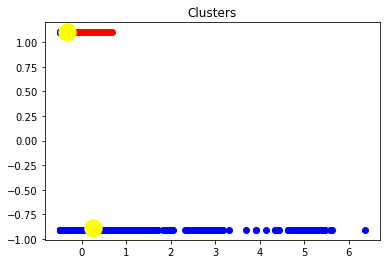

In [20]:


#scaler = StandardScaler() 
  
# To scale data 
#scaler.fit(dataset)

#X = preprocessing.scale(dataset)

#print(dataset)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(dataset)

scalerX = StandardScaler().fit(dataset)

X = scalerX.transform(dataset)


#X=X_scaled.values
#X=dataset.values
print(X)

#X_old = scalerX.inverse_transform(X)

#print(X_old)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [21]:
dataset
dataset['Cluster'].value_counts()

1    1291
0    1036
Name: Cluster, dtype: int64

In [22]:
grouped = dataset.groupby(dataset.Cluster)

cluster0 = grouped.get_group(0)
cluster1 = grouped.get_group(1)




In [23]:
cluster0=cluster0.drop(['Cluster'],axis=1)
cluster1=cluster1.drop(['Cluster'],axis=1)


In [24]:
print(cluster0.max()) 
print(cluster0.min())

print(cluster1.max()) 
print(cluster1.min())



Area             45771.0000
Labour_hours      1602.5000
Rainfall          1094.0000
Yield           163398.6928
fertilizer           1.0000
dtype: float64
Area               1.00
Labour_hours    1602.50
Rainfall         494.00
Yield              0.00
fertilizer         0.64
dtype: float64
Area              268653.00
Labour_hours        1602.50
Rainfall             649.00
Yield           88000000.00
fertilizer             0.82
dtype: float64
Area                1.00000
Labour_hours     1276.60000
Rainfall          494.00000
Yield           19952.29835
fertilizer          0.73000
dtype: float64


In [48]:
bin_area = [-1,700,5000,270000]
bin_labour = [-1,1000,1300,1650]
bin_rainfall = [400,500,700,1100]
bin_yield= [-1,55000,70000,89000000]
bin_fertilizer=[0,0.65,0.75,1]

In [58]:
category = pd.cut(cluster0.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster0,category],axis = 1)
df_new
category = pd.cut(cluster0.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster0.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 700]_a','(700, 5000]_a','(5000, 270000]_a','(-1, 1000]_l','(1000, 1300]_l','(1300, 1600]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 55000]_y','(55000, 70000]_y','(70000, 89000000]_y','(0.0, 0.65]_fert','(0.65, 0.75]_fert','(0.75, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.2, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('sugarcane_rules1.csv')
rules

(-1, 700]         378
(5000, 270000]    351
(700, 5000]       307
Name: range_area, dtype: int64
(55000, 70000]       370
(-1, 55000]          358
(70000, 89000000]    308
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,"((0.0, 0.65]_fert)","((500, 700]_r)",0.250000,0.444015,0.250000,1.000000,2.252174,0.138996,inf
84,"((0.0, 0.65]_fert, (1300, 1600]_l)","((500, 700]_r)",0.250000,0.444015,0.250000,1.000000,2.252174,0.138996,inf
87,"((0.0, 0.65]_fert)","((1300, 1600]_l, (500, 700]_r)",0.250000,0.444015,0.250000,1.000000,2.252174,0.138996,inf
31,"((400, 500]_r)","((0.75, 1.0]_fert)",0.332046,0.750000,0.332046,1.000000,1.333333,0.083012,inf
37,"((700, 1100]_r)","((0.75, 1.0]_fert)",0.223938,0.750000,0.223938,1.000000,1.333333,0.055985,inf
...,...,...,...,...,...,...,...,...,...
95,"((1300, 1600]_l)","((0.75, 1.0]_fert, (700, 1100]_r)",1.000000,0.223938,0.223938,0.223938,1.000000,0.000000,1.0
71,"((1300, 1600]_l)","((0.75, 1.0]_fert, (5000, 270000]_a)",1.000000,0.214286,0.214286,0.214286,1.000000,0.000000,1.0
63,"((1300, 1600]_l)","((700, 5000]_a, (500, 700]_r)",1.000000,0.211390,0.211390,0.211390,1.000000,0.000000,1.0
82,"((1300, 1600]_l)","((55000, 70000]_y, (500, 700]_r)",1.000000,0.204633,0.204633,0.204633,1.000000,0.000000,1.0


In [59]:
category = pd.cut(cluster1.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster1,category],axis = 1)
df_new
category = pd.cut(cluster1.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster1.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
#merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']
merged.columns=['(-1, 700]_a','(700, 5000]_a','(5000, 270000]_a','(-1, 1000]_l','(1000, 1300]_l','(1300, 1600]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 55000]_y','(55000, 70000]_y','(70000, 89000000]_y','(0.0, 0.65]_fert','(0.65, 0.75]_fert','(0.75, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.3, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('sugarcane_rules2.csv')
rules

(5000, 270000]    716
(700, 5000]       336
(-1, 700]         239
Name: range_area, dtype: int64
(-1, 55000]          754
(55000, 70000]       498
(70000, 89000000]     39
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((5000, 270000]_a)","((1000, 1300]_l)",0.554609,0.988381,0.554609,1.000000,1.011755,0.006444,inf
3,"((5000, 270000]_a)","((400, 500]_r)",0.554609,0.988381,0.554609,1.000000,1.011755,0.006444,inf
4,"((5000, 270000]_a)","((0.65, 0.75]_fert)",0.554609,0.988381,0.554609,1.000000,1.011755,0.006444,inf
6,"((400, 500]_r)","((1000, 1300]_l)",0.988381,0.988381,0.988381,1.000000,1.011755,0.011484,inf
7,"((1000, 1300]_l)","((400, 500]_r)",0.988381,0.988381,0.988381,1.000000,1.011755,0.011484,inf
...,...,...,...,...,...,...,...,...,...
118,"((400, 500]_r, (1000, 1300]_l)","((55000, 70000]_y, (0.65, 0.75]_fert)",0.988381,0.385747,0.385747,0.390282,1.011755,0.004482,1.007437
121,"((0.65, 0.75]_fert, (1000, 1300]_l)","((400, 500]_r, (55000, 70000]_y)",0.988381,0.385747,0.385747,0.390282,1.011755,0.004482,1.007437
122,"((400, 500]_r)","((55000, 70000]_y, (0.65, 0.75]_fert, (1000, 1...",0.988381,0.385747,0.385747,0.390282,1.011755,0.004482,1.007437
124,"((0.65, 0.75]_fert)","((400, 500]_r, (55000, 70000]_y, (1000, 1300]_l)",0.988381,0.385747,0.385747,0.390282,1.011755,0.004482,1.007437
